# Remote DevOps Jobs

## Objective
Analyze the job postings to determine:

1. Desired skills and experience
2. Pay scale 
3. What company has the most postings
4. Variations in job title

## Understanding the Column Data
* Title: job title
* Company: name of company
* Salary: if a salary is listed, it is provided here
* Description: the job description / details of position

## Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

In [9]:
csv = '~/code/indeed-web-scraper/2022/datasets/2022-02-02_devops_remote.csv'
df = pd.read_csv(csv)
df.head()

,Title,Company,Location,Salary,Description
0,Sr. DevOps Engineer - Automation Pipeline (REM...,Target,"Remote in Brooklyn Park, MN",None,\nVela is an open-source pipeline automation t...
1,DevOps Engineer (AWS) - REMOTE,R2-Global,+1 locationRemote,"$130,000 - $150,000 a year",\nYou will work within teams of 4 to 5 respect...
2,DevOps Engineer,Metadata,"Remote in California City, CA","Up to $100,000 a year",\nAbout UsWe are a team of highly dedicated pr...
3,Junior DevOps Engineer (India) –,CodeLathe Technologies,Remote,None,\nThis role is remote and will require working...
4,AWS DevOps,Hallmark Global Technologies,+1 locationRemote,$56 - $64 an hour,\nLONG TERM 12-MONTH CONTRACT.\nPAY RATE SCHED...


## Graphs

### Job Titles

<AxesSubplot:xlabel='Title'>

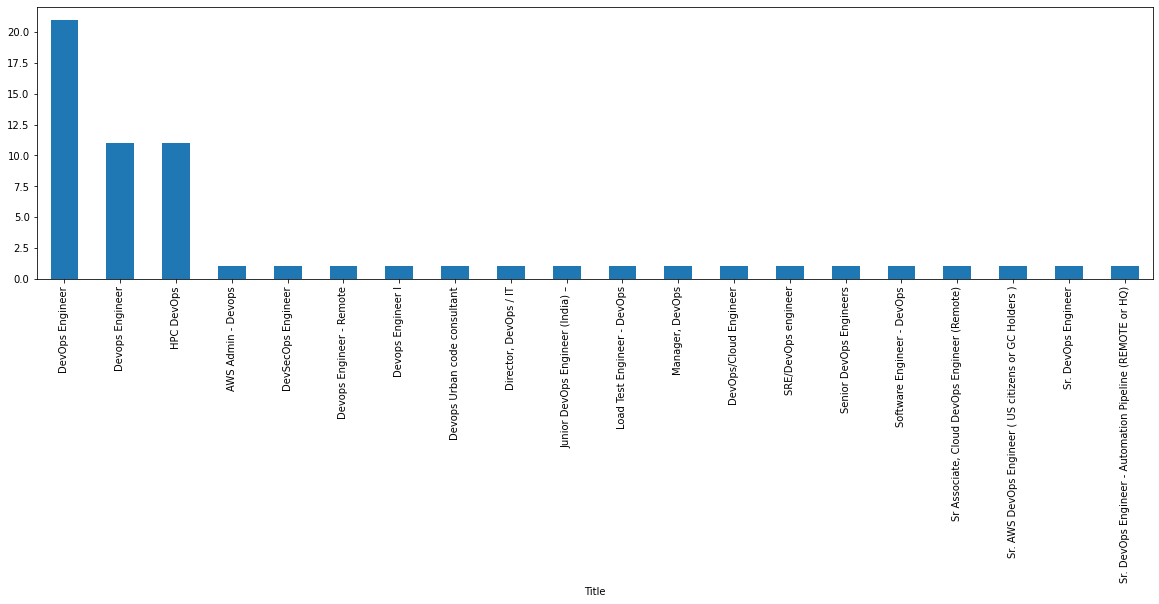

In [10]:
top_jobs = df.groupby("Title").count()["Location"].sort_values(ascending=False)[:20]
top_jobs.plot(kind="bar", figsize=(20,5))

### Companies

<AxesSubplot:xlabel='Company'>

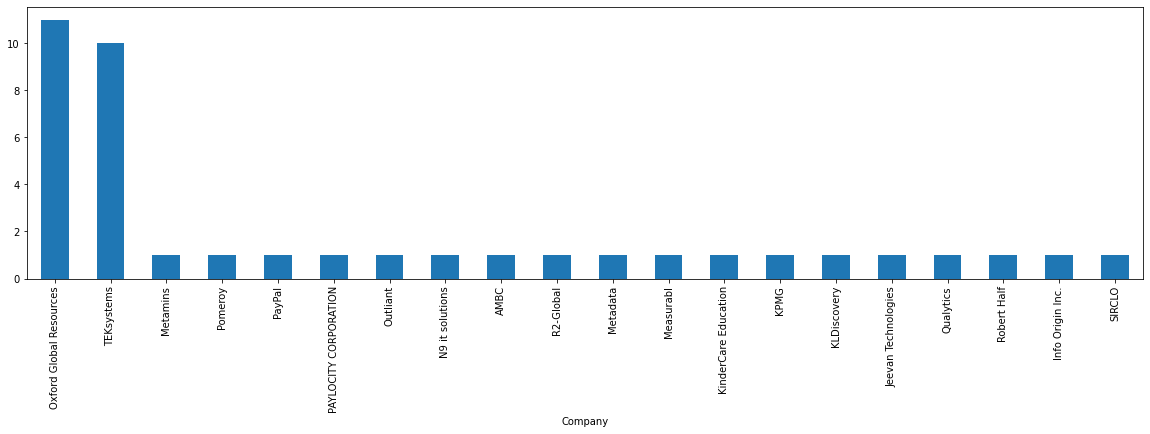

In [11]:
top_companies = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:20]
top_companies.plot(kind="bar", figsize=(20,5))

### Locations

All of these are remote. Some may require being in a specific timezone. 

In [12]:
top_locations = df.groupby("Location").count()["Title"].sort_values(ascending=False)[:20]
top_locations

Location
Remote                                   34
+1 locationRemote                        17
Remote in Lone Tree, CO+1 location       10
Remote in Minneapolis, MN                 2
+2 locationsRemote                        2
Remote in Scottsdale, AZ+1 location       1
Remote in San Diego, CA                   1
Remote in Refuge, MS+6 locations          1
Remote in Raleigh, NC                     1
Remote in Provo, UT                       1
Remote in Portland, OR+1 location         1
Remote in Pittsburgh, PA+11 locations     1
Remote in New York, NY                    1
Remote in New Orleans, LA                 1
Remote in Marietta, GA                    1
Remote in Mesa, AZ+5 locations            1
Remote in Marceline, MO                   1
Remote in Des Moines, IA                  1
Remote in California City, CA             1
Remote in Brooklyn Park, MN               1
Name: Title, dtype: int64

### Salary

In [14]:
top_munnies = df.groupby("Salary").count()["Title"].sort_values(ascending=False)[:20]
top_munnies

Salary
None                          35
From $50 an hour              11
$55 an hour                   10
From $100 an hour              2
$60 - $70 an hour              2
$1,500 - $2,500 a month        1
$75,000 - $120,000 a year      1
Up to $175,000 a year          1
Up to $120 an hour             1
Up to $115,000 a year          1
Up to $100,000 a year          1
From $180,000 a year           1
From $120,000 a year           1
$95,000 - $135,000 a year      1
$90 - $110 an hour             1
$80 - $90 an hour              1
$60 - $80 an hour              1
$60,000 - $90,000 a year       1
$100,000 - $125,000 a year     1
$56 - $64 an hour              1
Name: Title, dtype: int64

### Experience
The dataset only includes the summarized job description for now.

In [15]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [16]:
stop_words = stopwords.words('english')
tags_df = df["Description"].apply(cleanData)
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

#### AWS vs Azure

<AxesSubplot:>

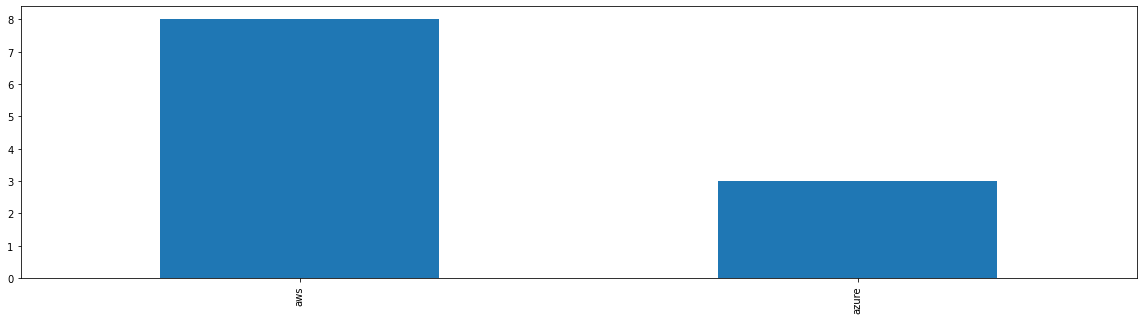

In [17]:
skills = ["aws","azure"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

#### Languages

<AxesSubplot:>

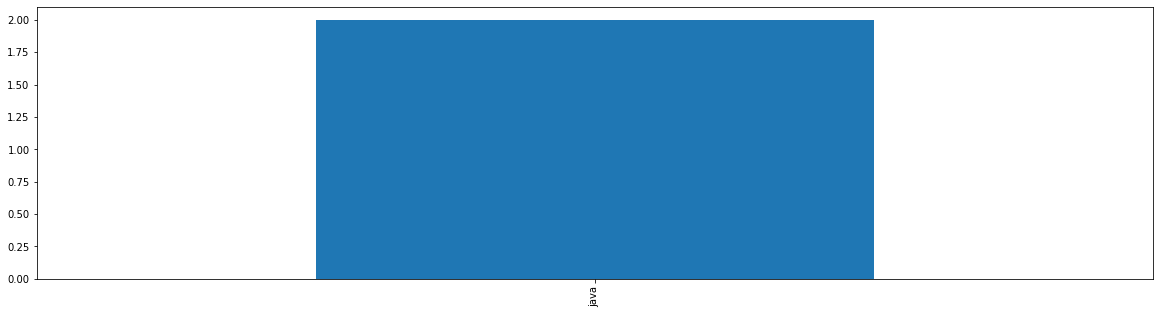

In [22]:
skills = ["java", "sql", "python", "golang"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

#### Tools

<AxesSubplot:>

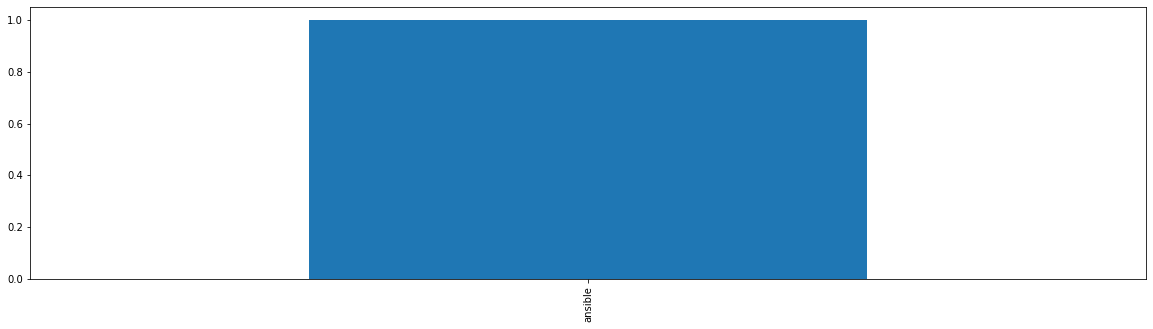

In [23]:
skills = ["ansible", "teraform", "jenkins", "docker"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

#### OS

<AxesSubplot:>

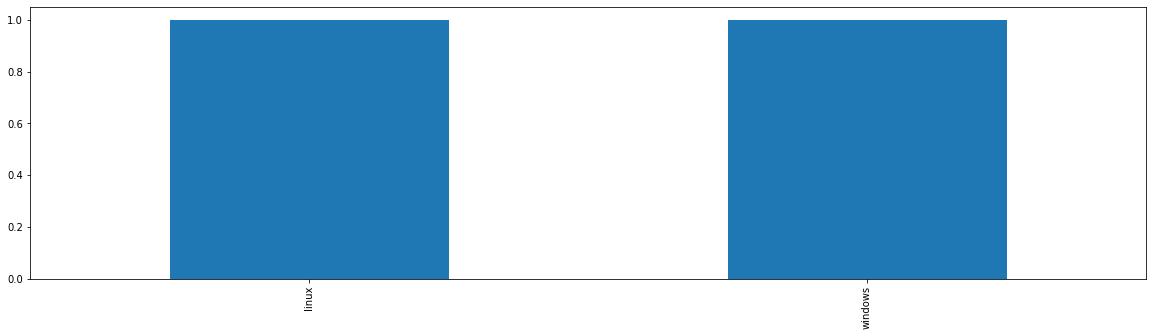

In [24]:
skills = ["linux", "windows", "macos", "docker"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

## Summary

- Experience
    - Java
    - Ansible
    - AWS
    - Linux and Windows

- Salary: From $50 - $55 an hour

- Top Companies
    - Oxford Global Resources
    - TEKSystems

- Top Title: DevOps Enineer

## Conclusion

Not having the full job description data severely impacts the results of our analysis. Despite this, we can see that that common DevOps skills still apply like Java and Ansible. AWS is desired more than Azure experience for remote positions. This is the opposite of two years ago when looking at Philadelphia.

You can expect to make around six figures or more when working in a remote DevOps role.

The top companies this time around are Oxford Global Resources and TEKsystems. Both of which are staffing agencies. At a remote scale, this isn't surprising. 

The top job title when searching "devops" is DevOps Engineer. 